In [46]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

data = pd.read_csv('dataset.csv')
data

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [48]:
data.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,1000.000000,970.000000,1000.000000
mean,500.500000,10.059970,16.982000,4.579381,56.732000
std,288.819436,5.696656,7.204553,2.914394,22.070915
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,250.750000,5.105000,11.000000,2.000000,41.000000
50%,500.500000,10.190000,17.000000,5.000000,55.500000
75%,750.250000,15.017500,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


### Remplir les champs vides

In [49]:
# print(data.isna().sum())
print(data.isnull().sum())
# print(data['Traffic_Level'].value_counts())
# print(data.shape)
# print(data['Traffic_Level'].mode()[0])
data['Weather'] = data['Weather'].fillna(data['Weather'].mode()[0])
data['Traffic_Level'] = data['Traffic_Level'].fillna(data['Traffic_Level'].mode()[0])
data['Time_of_Day'] = data['Time_of_Day'].fillna(data['Time_of_Day'].mode()[0])
data['Courier_Experience_yrs'] =  data['Courier_Experience_yrs'].fillna(data['Courier_Experience_yrs'].mean())

# print(data.isnull().sum())


Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64


In [50]:
print(data.duplicated().sum())

0


## Visualisation 

#### Matrice de correlation

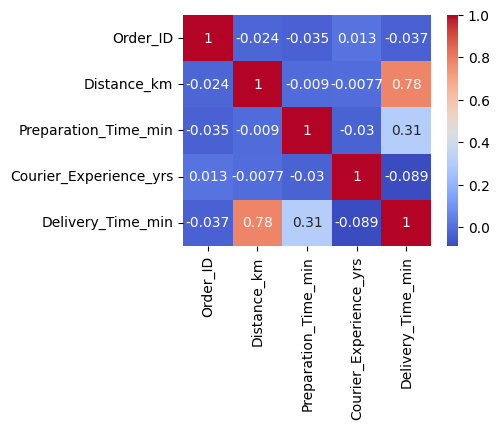

In [51]:
# data = data.drop(columns=['Order_ID'])
corr = data.corr(numeric_only=True)
plt.figure(figsize=(4,3))
sns.heatmap(corr , annot=True, cmap='coolwarm')
plt.show()

# fist show 
# d'apres la matrice de correlation on deduit que les colonnes inflence plus sur la cible (Delivery_Time_min) sont : 
# Distance_km 
# Preparation_Time_min


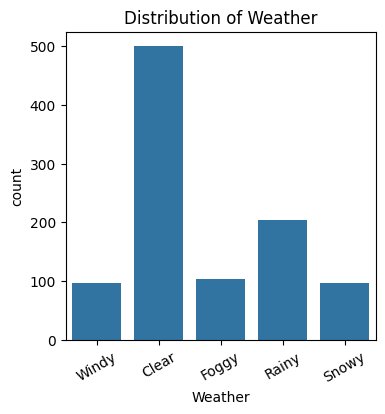

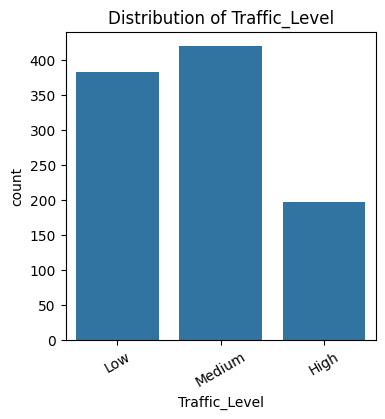

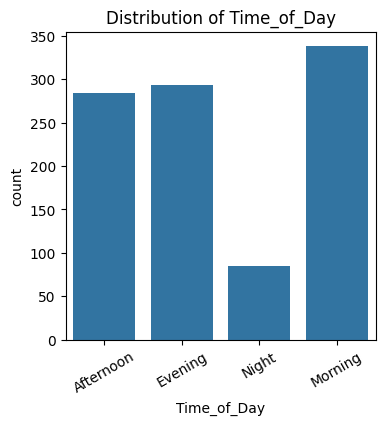

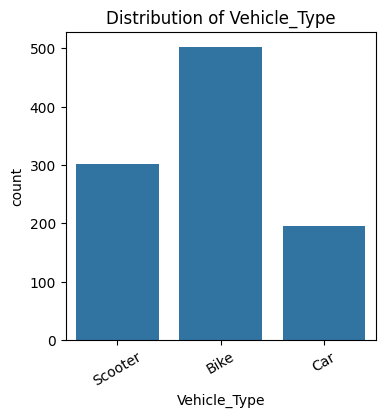

In [52]:
cols = ["Weather",	"Traffic_Level",	"Time_of_Day"	,"Vehicle_Type"]


for col in cols:
    if data[col].dtype == 'object':
        plt.figure(figsize=(4,4))
        sns.countplot(data=data,x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=30)
        plt.show()


# sns.countplot(data,x='Weather')
# sns.countplot(data,x='Traffic_Level')
# sns.countplot(data,x='Time_of_Day')
# sns.countplot(data,x='Vehicle_Type')

### Box Plot

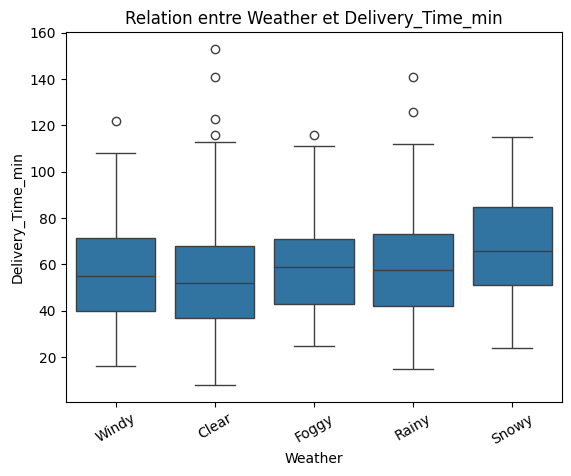

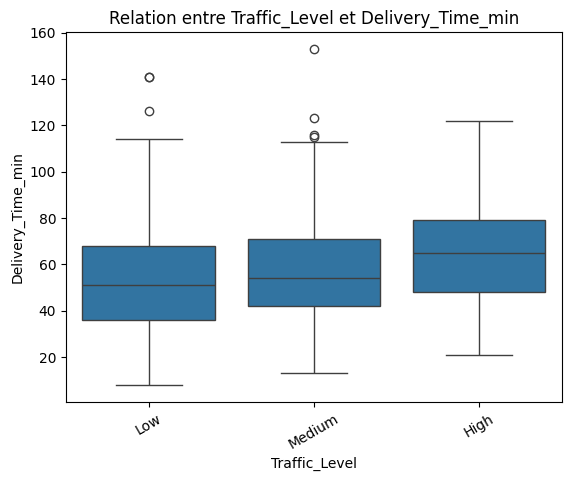

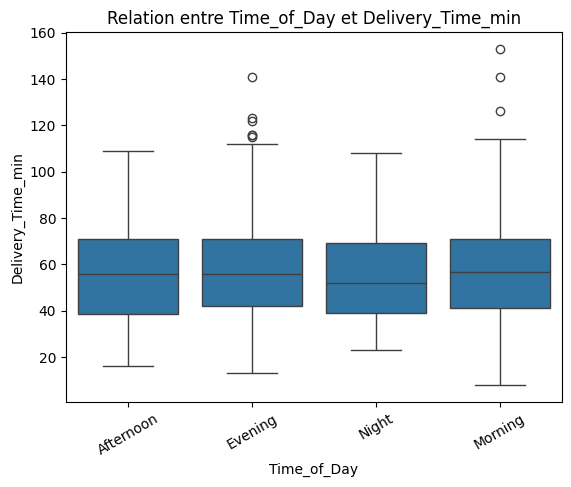

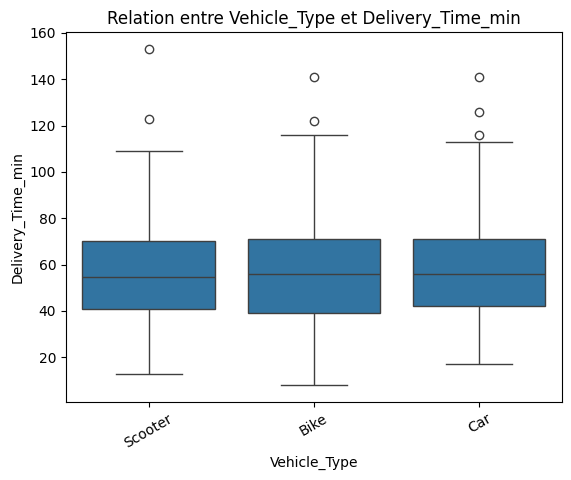

In [53]:
cols = data.select_dtypes(include='object').columns

for col in cols:
    sns.boxplot(data=data, x=col, y='Delivery_Time_min')
    plt.title(f'Relation entre {col} et Delivery_Time_min')
    plt.xticks(rotation=30)
    plt.show()
    
# d'apres les resultats de boxplot , les colonnes influencent plus sont : Weather , Traffic_Level


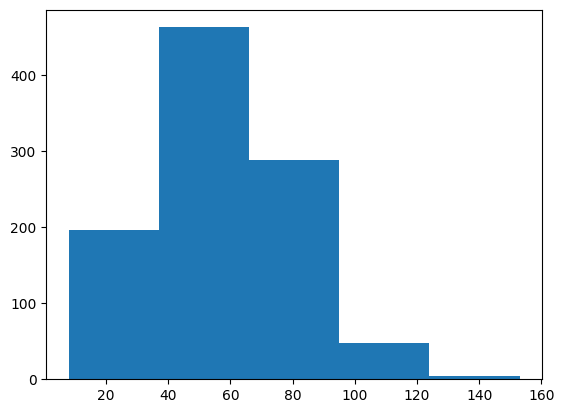

In [54]:
plt.hist(data['Delivery_Time_min'], bins=5)
plt.show()

### Encodage des colonnes categorielles

In [55]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler
# print(data.columns)
# print(data.to_string())

# drop columns

new_data = data.drop(columns=['Order_ID','Courier_Experience_yrs','Vehicle_Type'],axis=1)

# encoder les variables catégorielles

encoder = OneHotEncoder(sparse_output=False)

encoded_data = encoder.fit_transform(new_data[['Weather','Traffic_Level','Time_of_Day']])
variable_categorielles = encoder.get_feature_names_out(['Weather','Traffic_Level','Time_of_Day'])
encoded_df = pd.DataFrame(encoded_data, columns=variable_categorielles)
new_data = new_data.drop(columns=['Weather','Traffic_Level','Time_of_Day'])
new_data = pd.concat([encoded_df,new_data],axis=1)
print(new_data.head(5).to_string())
# print(new_data.shape)



   Weather_Clear  Weather_Foggy  Weather_Rainy  Weather_Snowy  Weather_Windy  Traffic_Level_High  Traffic_Level_Low  Traffic_Level_Medium  Time_of_Day_Afternoon  Time_of_Day_Evening  Time_of_Day_Morning  Time_of_Day_Night  Distance_km  Preparation_Time_min  Delivery_Time_min
0            0.0            0.0            0.0            0.0            1.0                 0.0                1.0                   0.0                    1.0                  0.0                  0.0                0.0         7.93                    12                 43
1            1.0            0.0            0.0            0.0            0.0                 0.0                0.0                   1.0                    0.0                  1.0                  0.0                0.0        16.42                    20                 84
2            0.0            1.0            0.0            0.0            0.0                 0.0                1.0                   0.0                    0.0            

### Normalisation

In [56]:
from sklearn.model_selection import train_test_split
# split data to x , y
X = new_data.drop(columns=['Delivery_Time_min'])
y = new_data['Delivery_Time_min']

# print(X.head(5).to_string())
# print(y.head(5).to_string())

# split x y to train/test 

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

needed_cols = ["Distance_km" , "Preparation_Time_min"]
scaler = StandardScaler()
X_train[needed_cols] = scaler.fit_transform(X_train[needed_cols])
X_test[needed_cols] = scaler.transform(X_test[needed_cols])



### Entrainement du model

In [57]:
from sklearn.ensemble import RandomForestRegressor
# model = LogisticRegression()
model = RandomForestRegressor(random_state=42)
model.fit(X_train , y_train)
y_predict = model.predict(X_test)

### Score par R2 et MAE

In [58]:
from sklearn.metrics import r2_score , mean_absolute_error
# r2 = r2_score(y_test , y_predict)
# mean_absolute_error_ = mean_absolute_error(y_test , y_predict)

# print(f'r2 : {r2} \nmean_absolute_error : {mean_absolute_error_}')

# ''' 
#     score sans 'Time_of_Day' donne 
#     r2 : 0.7641589632127785 
#     mean_absolute_error : 7.22765
# '''
# '''
#     score avec 'Time_of_Day' donne 
#     r2 : 0.7837270191067818 
#     mean_absolute_error : 6.8938999999999995
# '''


### Utilisation de SelectKBest

In [59]:
from sklearn.feature_selection import SelectKBest , f_regression # f_classif au cas de classification
from sklearn.svm import SVR
print(X_train.shape)

# SelectKBest

selector = SelectKBest(score_func=f_regression,k=5)

X_train_s = selector.fit_transform(X_train,y_train)
X_test_s = selector.transform(X_test)



# print(X_train_s)
print(X_train.columns[selector.get_support()])
# train model

# model = RandomForestRegressor(random_state=42)

model = SVR()

#'''
#   r2 : 0.7626071824142049 
#    mean_absolute_error : 6.898832816097272
# '''

# model.fit(X_train_s , y_train)
# y_predict = model.predict(X_test_s)

# score 

r2 = r2_score(y_test , y_predict)
mean_absolute_error_ = mean_absolute_error(y_test , y_predict)

print(f'r2 : {r2} \nmean_absolute_error : {mean_absolute_error_}')

# print(X.shape)
# print(new_data.shape)
# print(X.columns[selector.get_support()])

(800, 14)
Index(['Weather_Clear', 'Weather_Snowy', 'Traffic_Level_High', 'Distance_km',
       'Preparation_Time_min'],
      dtype='object')
r2 : 0.7786859258080128 
mean_absolute_error : 7.0417000000000005


### Utilisation de GridSearchCv

In [60]:
from sklearn.model_selection import GridSearchCV
# grid params

# grid_param = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [5, 10, 15, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

param_grid = {
    'kernel': ['rbf', 'poly', 'linear'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.2, 0.5]
}


grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=2
    )


grid_search.fit(X_train_s,y_train)
best_model = grid_search.best_estimator_
y_predict = best_model.predict(X_test_s)

r2 = r2_score(y_test , y_predict)
mean_absolute_error_ = mean_absolute_error(y_test , y_predict)

print(f'r2 : {r2} \nmean_absolute_error : {mean_absolute_error_}')

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
r2 : 0.7980954916714139 
mean_absolute_error : 6.373526434644844


### Pipeline

#### SVR

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

new_data = data.drop(columns=['Order_ID','Courier_Experience_yrs','Vehicle_Type'],axis=1)

X = new_data.drop(columns=['Delivery_Time_min'])
y = new_data['Delivery_Time_min']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

cols_num = ["Distance_km" , "Preparation_Time_min"]
cols_cat = ['Weather','Traffic_Level','Time_of_Day']

transformer = ColumnTransformer([
    ('num', StandardScaler(),cols_num),
    ('cat', OneHotEncoder() ,cols_cat)
])

param_grid = {
        'select__k': list(range(1, 15)),
        'model__kernel': ['rbf', 'linear'],
        'model__C': [1, 10],
        'model__gamma': ['scale', 0.1],
        'model__epsilon': [0.1, 0.2]
    }


pipeline = Pipeline([
        ('transformer',transformer),
        ('select',SelectKBest(score_func=f_regression)),
        ('model', SVR())
    ])

grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring='r2',
        cv=5,
        n_jobs=-1,
        verbose=1,
        return_train_score=True
        )

grid_search.fit(X_train , y_train)

# best_model = grid_search.best_estimator_
results = pd.DataFrame(grid_search.cv_results_)
for k in range(1, 15):
        scores_k = results[results['param_select__k'] == k]['mean_test_score']
        print(f"k = {k} -> R2 moyen : {scores_k.values.max():.4f}")
    # y_predict = best_model.predict(X_test)

    # r2 = r2_score(y_test , y_predict)
    # mean_absolute_error_ = mean_absolute_error(y_test , y_predict)
    # print(f'Best k = {best_model.named_steps["select"].k}')
    # print(f'r2 : {r2} \nmean_absolute_error : {mean_absolute_error_}')


Fitting 5 folds for each of 224 candidates, totalling 1120 fits
k = 1 -> R2 moyen : 0.5920
k = 2 -> R2 moyen : 0.6956
k = 3 -> R2 moyen : 0.7090
k = 4 -> R2 moyen : 0.7211
k = 5 -> R2 moyen : 0.7294
k = 6 -> R2 moyen : 0.7440
k = 7 -> R2 moyen : 0.7435
k = 8 -> R2 moyen : 0.7431
k = 9 -> R2 moyen : 0.7425
k = 10 -> R2 moyen : 0.7439
k = 11 -> R2 moyen : 0.7439
k = 12 -> R2 moyen : 0.7440
k = 13 -> R2 moyen : 0.7443
k = 14 -> R2 moyen : 0.7443


#### RandomForestRegression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

new_data = data.drop(columns=['Order_ID','Courier_Experience_yrs','Vehicle_Type'],axis=1)

X = new_data.drop(columns=['Delivery_Time_min'])
y = new_data['Delivery_Time_min']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

cols_num = ["Distance_km" , "Preparation_Time_min"]
cols_cat = ['Weather','Traffic_Level','Time_of_Day']

transformer = ColumnTransformer([
    ('num', StandardScaler(),cols_num),
    ('cat', OneHotEncoder() ,cols_cat)
])

pipeline = Pipeline([
    ('transformer',transformer),
    ('select',SelectKBest(score_func=f_regression , k=5)),
    ('model', RandomForestRegressor())
])

grid_param = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [5, 10, 15, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=grid_param,
    scoring='r2',
    cv=5,
    )

grid_search.fit(X_train , y_train)

best_model = grid_search.best_estimator_

y_predict = best_model.predict(X_test)

r2 = r2_score(y_test , y_predict)
mean_absolute_error_ = mean_absolute_error(y_test , y_predict)

print(f'r2 : {r2} \nmean_absolute_error : {mean_absolute_error_}')
